### problem statement

### data description

In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [547]:
d = pd.read_csv("https://raw.githubusercontent.com/sekhrianchal6/Arima/main/Maternal%20Health%20Risk%20Data%20Set.csv")

In [548]:
d.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [549]:
d.shape

(1014, 7)

In [550]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [551]:
d.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [552]:
d.duplicated().sum()
# no. of duplicates rows

562

In [553]:
d['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
#df['RiskLevel'] = df['RiskLevel'].astype(float)
d.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3
1,35,140,90,13.0,98.0,70,3
2,29,90,70,8.0,100.0,80,3
3,30,140,85,7.0,98.0,70,3
4,35,120,60,6.1,98.0,76,1


### drop the duplicate rows

In [554]:
#d=d.drop_duplicates()
# dropping duplicates rows

In [555]:
d.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# Exploratory Data Analysis

### Age Distribution

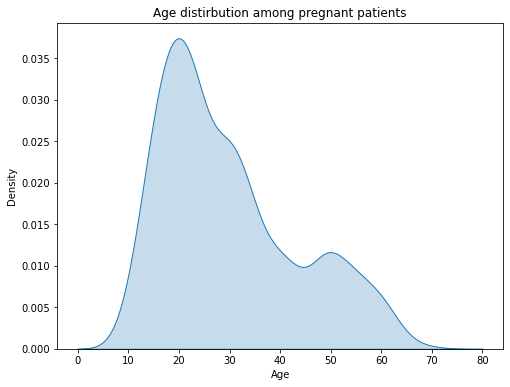

In [556]:
plt.figure(figsize=(8,6))
sns.kdeplot(d['Age'], shade=True)
plt.title('Age distirbution among pregnant patients')
plt.show()

 Most of the pregnant patients in the dataset are below their forties

### Age and Risk Level

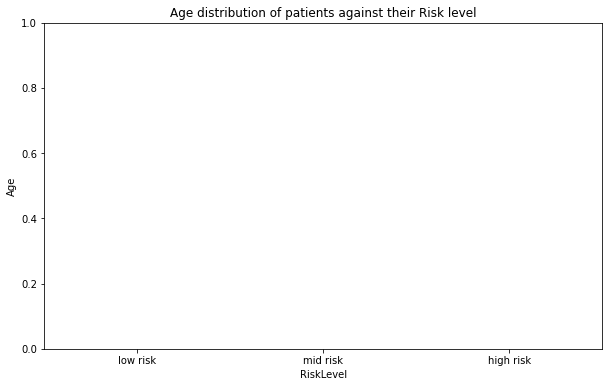

In [557]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='Age', data=d, order=['low risk', 'mid risk', 'high risk'])
plt.xlabel('RiskLevel')
plt.ylabel('Age')
plt.title('Age distribution of patients against their Risk level');

The boxplot shows a positive correlation between age and risk level.The older a patient, the higher their health risk level

### Diastolic BP and Risk Level

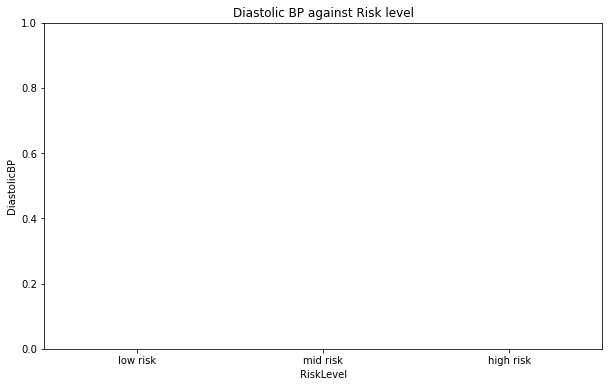

In [558]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='DiastolicBP', data=d, order=['low risk', 'mid risk', 'high risk'])
plt.title('Diastolic BP against Risk level');

A fairly positive correlation between diastolic blood pressure and risk level.Patients with low diastolic pressure are less likely to suffer health risk

### Sytolic BP and Risk Level

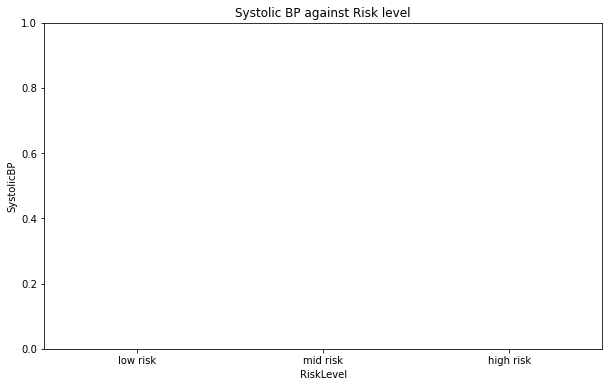

In [559]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='SystolicBP', data=d, order=['low risk', 'mid risk', 'high risk'])
plt.title('Systolic BP against Risk level');

A fairly positive correlation between systolic blood pressure and risk level.

### Blood Sugar Level and Risk level

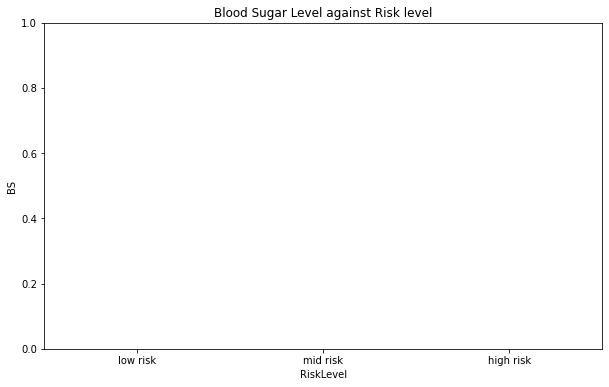

In [560]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='BS', data=d, order=['low risk', 'mid risk', 'high risk'])
plt.title('Blood Sugar Level against Risk level');

There seems to be relationship between blood sugar level and risk level.Patients with high blood sugar tends to be at high health risk

### Body Temperature and Risk level

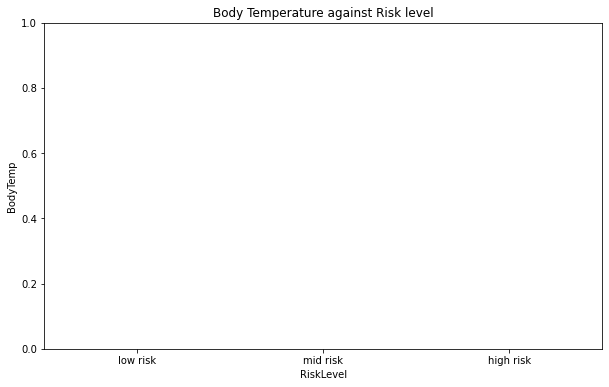

In [561]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='BodyTemp', data=d, order=['low risk', 'mid risk', 'high risk'])
plt.title('Body Temperature against Risk level');

There doesn't seem to be a strong relationship between body temperature and risk level, as we have low-temperature patients with high risk level and vice versa

### Heart Rate and Risk level

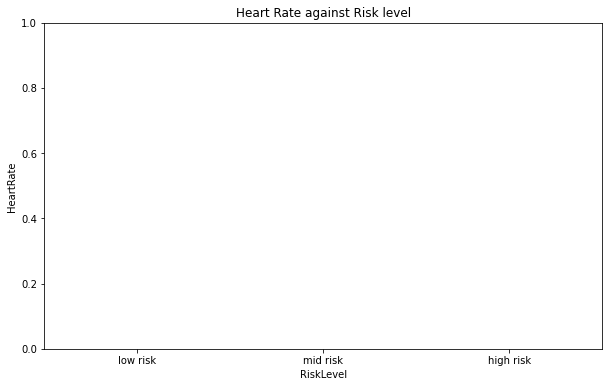

In [562]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='HeartRate', data=d, order=['low risk', 'mid risk', 'high risk'])
plt.title('Heart Rate against Risk level');

There's a slight correlation between heart rate and risk level

# Histplot and boxplot of different features with age

In [563]:
def num_plot(d, col):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(data=d, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=d, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")
    plt.show()

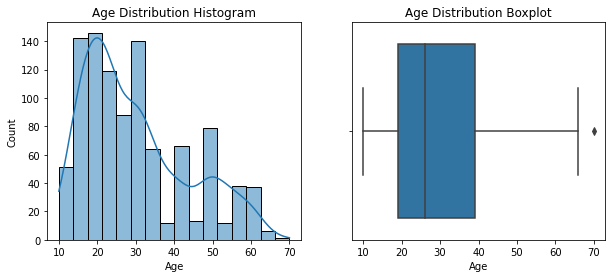

In [564]:
num_plot(d,"Age")

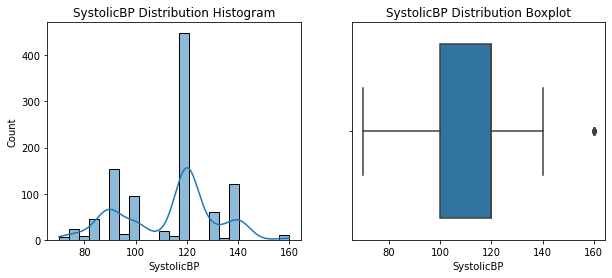

In [565]:
num_plot(d, "SystolicBP")

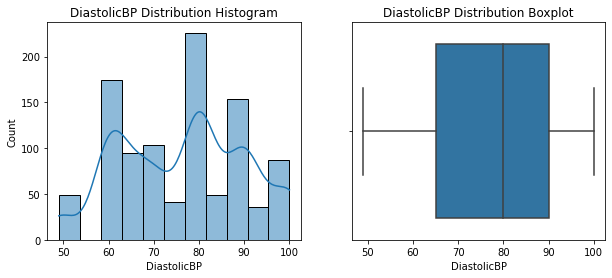

In [566]:
num_plot(d, "DiastolicBP")

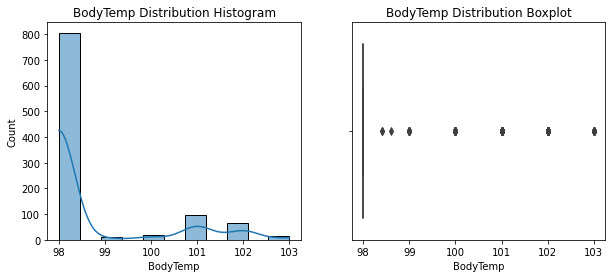

In [567]:
num_plot(d, "BodyTemp")

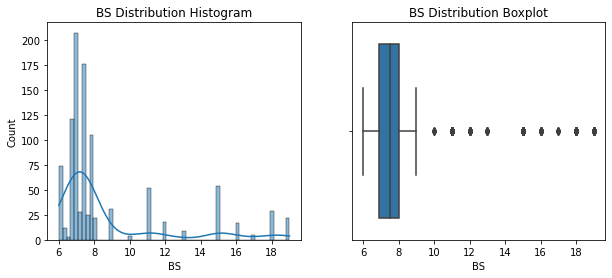

In [568]:
num_plot(d, "BS")

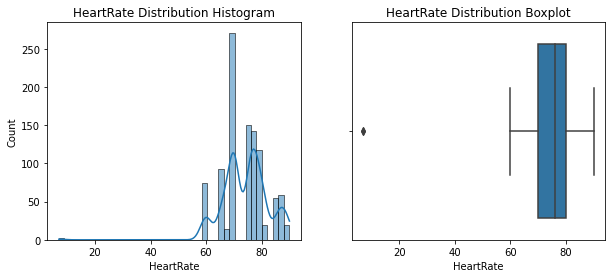

In [569]:
num_plot(d, "HeartRate")

# Algorithm Selection

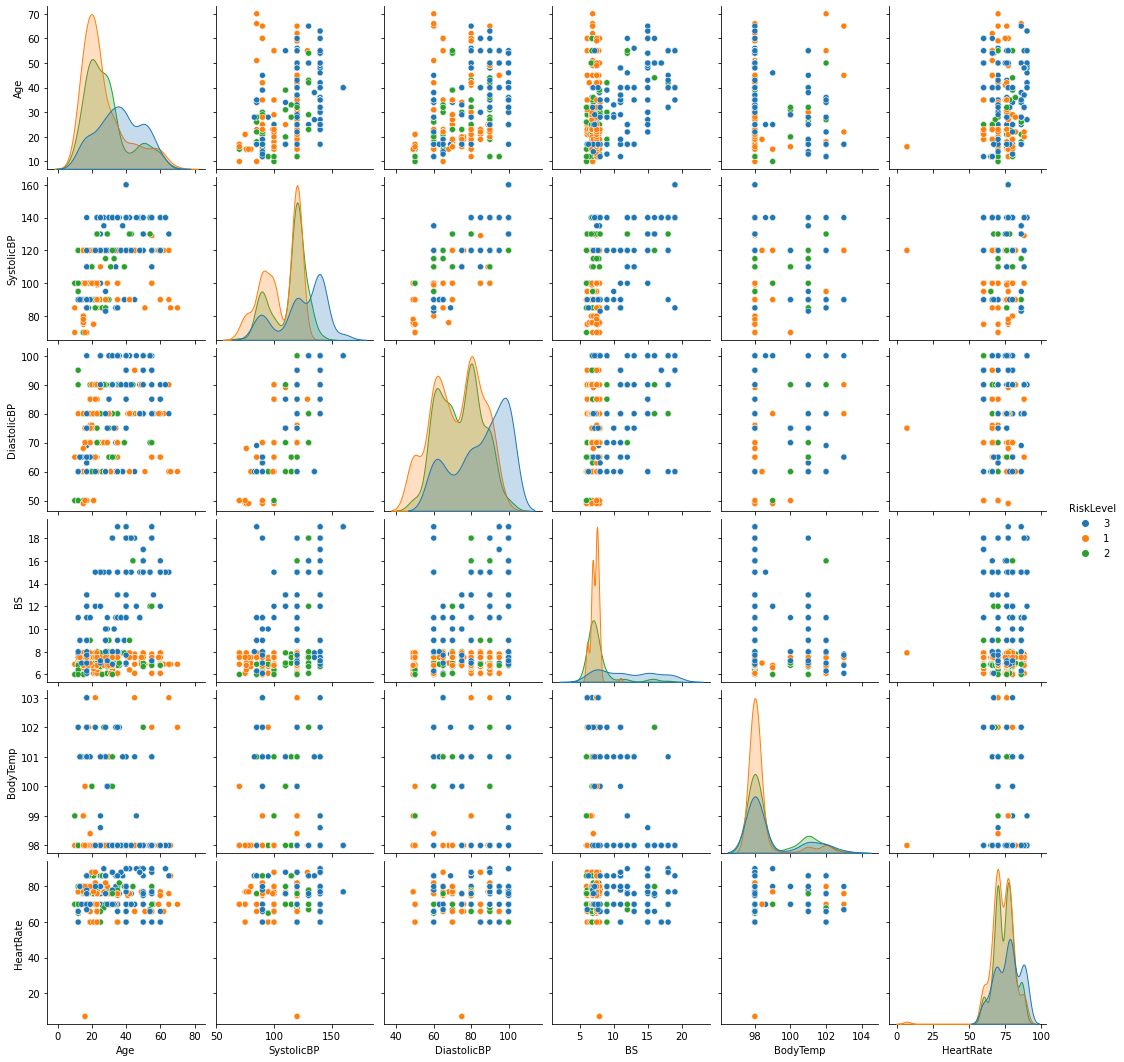

In [570]:
sns.pairplot(d, hue='RiskLevel')

# Model Training

In [571]:
x = d.drop(['RiskLevel','BS'],axis=1)
y = d['RiskLevel']

In [572]:
from sklearn.model_selection import train_test_split

In [573]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [574]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(709, 5)
(305, 5)
(709,)
(305,)


In [575]:
#d with duplicates
dfwd = d.copy()

In [576]:
#d of only duplicates
dfd = d.loc[d.duplicated(),:]

In [577]:
# df without duplicates
dfwnd = d.drop_duplicates()

In [578]:
print(f"data with duplicates: {len(dfwd)}\ndata without duplicates: {len(dfwnd)}\ndata of only duplicates entries: {len(dfd)}")

data with duplicates: 1014
data without duplicates: 452
data of only duplicates entries: 562


In [579]:
x

,Age,SystolicBP,DiastolicBP,BodyTemp,HeartRate
0,25,130,80,98.0,86
1,35,140,90,98.0,70
2,29,90,70,100.0,80
3,30,140,85,98.0,70
4,35,120,60,98.0,76
...,...,...,...,...,...
1009,22,120,60,98.0,80
1010,55,120,90,98.0,60
1011,35,85,60,98.0,86
1012,43,120,90,98.0,70


In [580]:
y

0       3
1       3
2       3
3       3
4       1
       ..
1009    3
1010    3
1011    3
1012    3
1013    2
Name: RiskLevel, Length: 1014, dtype: object

[0.26764699 0.2838731  0.20328836 0.08503811 0.16015343]


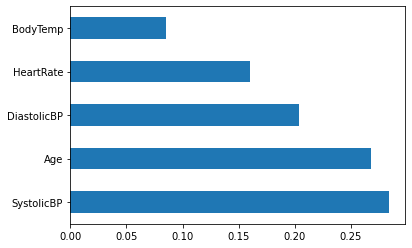

In [591]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [581]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [582]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [583]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [588]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [593]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = rf_random
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
base_model.get_params(deep=True)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)